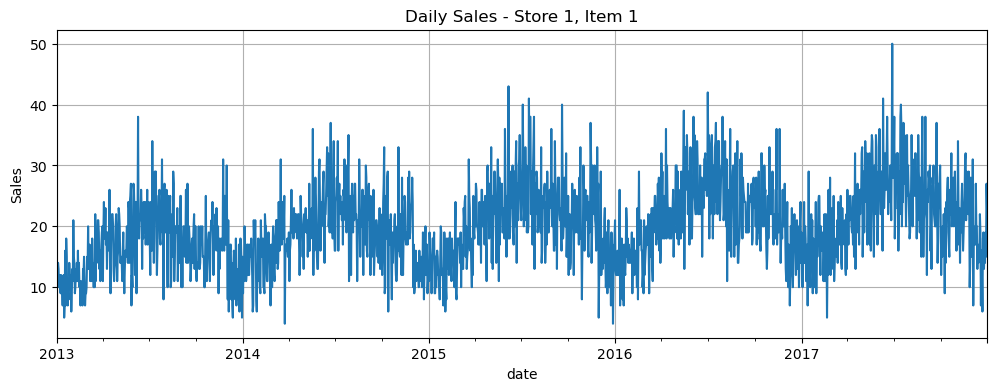

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14177D+00    |proj g|=  8.97345D-02

At iterate    5    f=  2.96628D+00    |proj g|=  6.17652D-02

At iterate   10    f=  2.95859D+00    |proj g|=  4.77083D-03

At iterate   15    f=  2.95446D+00    |proj g|=  4.32665D-03

At iterate   20    f=  2.95439D+00    |proj g|=  1.08226D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     25      1     0     0   5.336D-06   2.954D+00
  F =   2.9543936002161133     

CONVERG

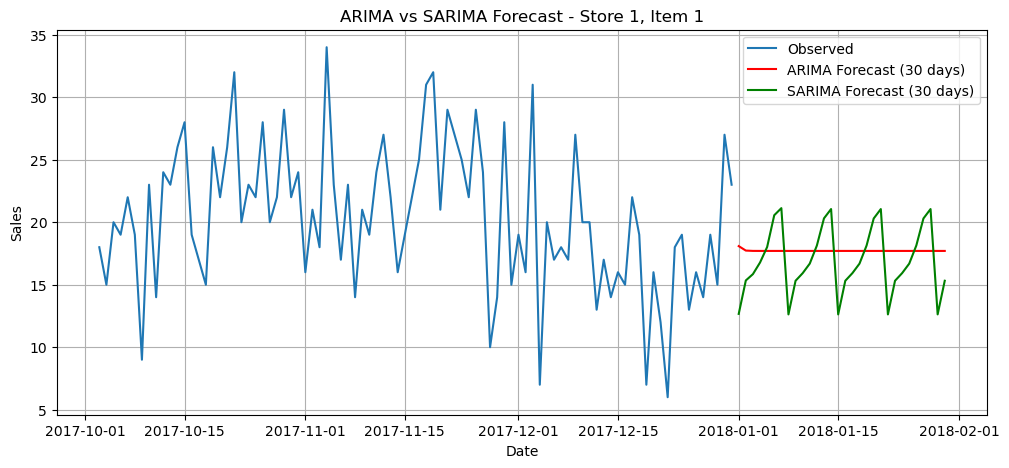

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

file_path = "/Users/anirudhravipudi/Desktop/demand-forecasting-kernels-only/train.csv"
df = pd.read_csv(file_path)

df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

series_df = df[(df['store'] == 1) & (df['item'] == 1)]
series_df = series_df.groupby('date')['sales'].sum()

series_df.plot(title='Daily Sales - Store 1, Item 1', figsize=(12, 4))
plt.ylabel('Sales')
plt.grid()
plt.show()

arima_model = ARIMA(series_df, order=(1, 1, 1))
arima_result = arima_model.fit()
arima_forecast = arima_result.forecast(steps=30)

sarima_model = SARIMAX(series_df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.forecast(steps=30)

plt.figure(figsize=(12, 5))
plt.plot(series_df[-90:], label='Observed')
plt.plot(arima_forecast, label='ARIMA Forecast (30 days)', color='red')
plt.plot(sarima_forecast, label='SARIMA Forecast (30 days)', color='green')
plt.title('ARIMA vs SARIMA Forecast - Store 1, Item 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.14010D+00    |proj g|=  9.49580D-02

At iterate    5    f=  2.96707D+00    |proj g|=  6.19945D-02

At iterate   10    f=  2.95616D+00    |proj g|=  6.00377D-03

At iterate   15    f=  2.95226D+00    |proj g|=  8.52964D-04

At iterate   20    f=  2.95219D+00    |proj g|=  6.50107D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     26      1     0     0   3.438D-05   2.952D+00
  F =   2.9521925795827300     

CONVERG

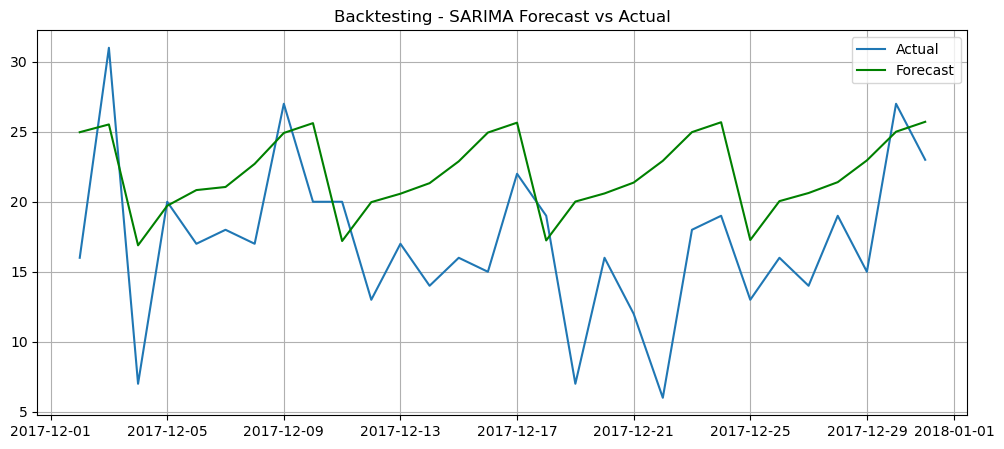

In [4]:
df = pd.read_csv("/Users/anirudhravipudi/Desktop/demand-forecasting-kernels-only/train.csv")
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

series = df[(df['store'] == 1) & (df['item'] == 1)].groupby('date')['sales'].sum()

train_series = series[:-30]  
val_series = series[-30:]    

from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_series, order=(1,1,1), seasonal_order=(1,1,1,7))
result = model.fit()

forecast = result.forecast(steps=30)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(val_series.index, val_series, label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.title('Backtesting - SARIMA Forecast vs Actual')
plt.legend()
plt.grid()
plt.show()

In [6]:
test_df = pd.read_csv("/Users/anirudhravipudi/Desktop/demand-forecasting-kernels-only/test.csv")
train_df = pd.read_csv("/Users/anirudhravipudi/Desktop/demand-forecasting-kernels-only/train.csv")

train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

submission = test_df.copy()

from tqdm import tqdm
from statsmodels.tsa.statespace.sarimax import SARIMAX

predictions = []

for (store, item), group in tqdm(train_df.groupby(['store', 'item'])):
    sales_series = group.groupby('date')['sales'].sum()

    try:
        model = SARIMAX(sales_series, order=(1,1,1), seasonal_order=(1,1,1,7))
        result = model.fit(disp=False)
        future_dates = test_df[(test_df['store'] == store) & (test_df['item'] == item)]['date']
        forecast = result.forecast(steps=len(future_dates))
    except:
        forecast = [sales_series.mean()] * len(future_dates)

    predictions.extend(forecast)

submission['sales'] = predictions

submission.to_csv("submission.csv", index=False)

100%|█████████████████████████████████████████| 500/500 [08:30<00:00,  1.02s/it]
